<a href="https://colab.research.google.com/github/emadaghajanzadeh/Clustring_with_Neural_Networks/blob/main/computational_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kmeans

##Import Libraries

In [1]:
from keras.datasets import mnist
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Data Loading

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


##Kmeans Evaluation

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,max_iter=30).fit(x_train.reshape(x_train.shape[0], input_shape[0]*input_shape[1]))

In [ ]:
y_pred = kmeans.predict(x_test.reshape(x_test.shape[0], input_shape[0]*input_shape[1]))

In [ ]:
from sklearn.metrics.cluster import rand_score
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
print(rand_score(np.argmax(y_test, axis = -1 ), y_pred))
print(purity_score(np.argmax(y_test, axis = -1 ), y_pred))

0.8801961796179618
0.5944


In [ ]:
from sklearn.metrics.cluster import rand_score
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

max_iteration = [10,30,50,70,90,110]
num_clusters = [2,5,8,10,15,20]
result1 = []
result2 = []
# for iter in max_iteration:
#   print(iter)
#   kmeans = KMeans(n_clusters=10,max_iter=iter).fit(x_train.reshape(x_train.shape[0], input_shape[0]*input_shape[1]))
#   y_pred = kmeans.predict(x_test.reshape(x_test.shape[0], input_shape[0]*input_shape[1]))
#   result1.append(rand_score(np.argmax(y_test, axis = -1 ), y_pred))
#   result2.append(purity_score(np.argmax(y_test, axis = -1 ), y_pred))
for cluster in num_clusters:
  print(cluster)
  kmeans = KMeans(n_clusters=cluster,max_iter=30).fit(x_train.reshape(x_train.shape[0], input_shape[0]*input_shape[1]))
  y_pred = kmeans.predict(x_test.reshape(x_test.shape[0], input_shape[0]*input_shape[1]))
  result1.append(rand_score(np.argmax(y_test, axis = -1 ), y_pred))
  result2.append(purity_score(np.argmax(y_test, axis = -1 ), y_pred))


2
5
8
10
15
20


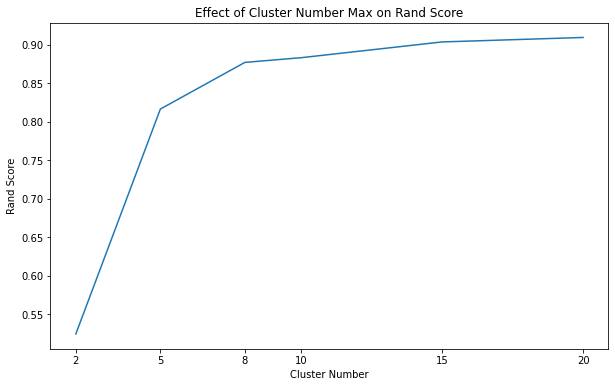

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(num_clusters, result1)
plt.xlabel("Cluster Number")
plt.ylabel("Rand Score")
plt.xticks(num_clusters)
plt.title("Effect of Cluster Number Max on Rand Score")
plt.savefig("./rand_score", dpi = 300)

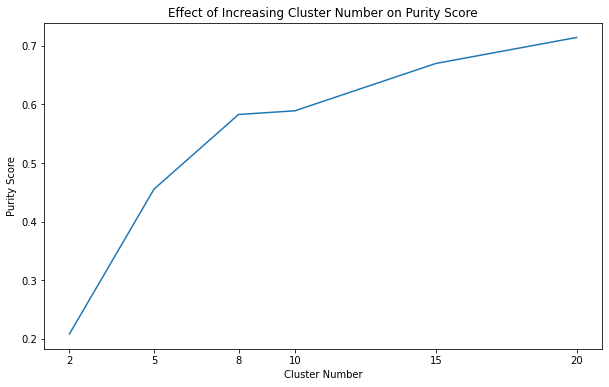

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(num_clusters, result2)
plt.xlabel("Cluster Number")
plt.ylabel("Purity Score")
plt.xticks(num_clusters)
plt.title("Effect of Increasing Cluster Number on Purity Score")
plt.savefig("./purity_score", dpi = 300)

#Multi-Layer Perceptron (MLP)

##Data Loading

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.datasets import mnist
import keras
import numpy as np
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
# !pip install --upgrade scikit-learn
# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


##Model Construction

In [2]:
import keras.backend as K

#MLP
# model = Sequential()
# model.add(Dense(32, input_shape=input_shape, activation='relu'))
# model.add(Dense(16,  activation='relu'))
# model.add(Dense(10, activation = "softmax"))
# model.summary()

#CNN
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

##Training Algorithm

In [3]:
random_indexes = np.ceil(X_train.shape[0]*np.random.random(10)).astype(int)
centersX = X_train[random_indexes]
centersY = np.arange(0,10)
centersY

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
from tensorflow.keras.utils import to_categorical
def loss_fn(yPred, yTrue):
      return keras.losses.categorical_crossentropy(to_categorical(yTrue), yPred)
optimizer = keras.optimizers.Adam()
epochs = 5
# centersY = to_categorical(centersY, num_classes=10)
for epoch in range(epochs):
    print("\n Epoch %d" % (epoch+1,))

    # Iterate over the batches of the dataset.
    for step, x_batch_train in enumerate(centersX):
        x_batch_train = centersX
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            
            logits = model(x_batch_train.reshape(-1,28,28,1))  # Logits for this minibatch
            # Compute the loss value for this minibatch.

            loss_value = loss_fn(logits, centersY)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        prediction = np.argmax(model(X_train.reshape(-1,28,28,1)), axis=-1)
        indexes = {}
        # means = {}
    for i in range(10):
          indexes[i] = np.where(prediction == i)[0]
          samples = X_train[indexes[i]]
          centersX[i] = np.mean(samples, axis=0)
          centersY[i] = i




 Epoch 1

 Epoch 2

 Epoch 3

 Epoch 4

 Epoch 5


##Model Evaluation

In [5]:
y_pred = model.predict(X_test.reshape(-1,28,28,1))
# print(y_pred[0])
# print(y_pred[1])
from sklearn.metrics.cluster import rand_score
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
print(rand_score(np.argmax(Y_test, axis = -1 ), np.argmax((y_pred), axis = -1)))
print(purity_score(np.argmax(Y_test, axis = -1 ), np.argmax((y_pred), axis = -1)))

0.8484663266326633
0.4522
